## Computational Statistics Graded Assignment 1 


### Question 1 

To inspect the limitation of $R^2$ score in datasets with many features, we simulated the following scenario : 
> In each iteration of the simulation 
- We have an initial data which involves the target $y$ and a single $X$. 
- We train an initial linear regression model to fit a line to our dataset, and record Mean Squared Error on validation set and the $R^2$ metric. 
- We then expand our dataset by adding $n$ features one by one and record the metrics as well. 
- Then we observe and compare the resulting MSE and $R^2$ values with respect to varying feature numbers. 

In [1]:
import numpy as np 
import pandas as pd 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score

def initial_data(row_size=1000,noise_level = 0.1):
    X = np.random.rand(row_size)
    #LLMs are used to get the syntax for addition of noise 
    y = 3 * X.squeeze() + np.random.randn(row_size) * 0.1
    data = pd.DataFrame({'X': X, 'y': y})
    return data


def linear_model(data):
    X = data.drop('y',axis=1)
    y = data['y']

    model = LinearRegression()

    scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    mse = -scores.mean()  # cross_val_score returns negative MSE for sorting purposes (fixed using LLM) 
    model.fit(X, y)
    y_pred = model.predict(X)
    r_squared = r2_score(y, y_pred)
    mse_train = mean_squared_error(y, y_pred)
    
    ssr = np.sum((y - y_pred) ** 2)
    sstot = np.sum((y - np.mean(y)) ** 2)
    return mse, r_squared,mse_train,ssr,sstot
        

def add_feature(data,name_index = 1):
    X_i = np.random.rand(len(data))
    data[f'X_{name_index}'] = X_i
    
    return data

def add_feature_and_linear_fit(feature_size = 50,row_size=1000):

    mse_dict={}
    r_squared_dict={}
    mse_train_dict={}
    ssr_dict={}
    sstot_dict = {}

    data = initial_data()

    for i in range(0,feature_size):
        #print(f"number of features : {data.shape[1]}")
        mse,r_squared,mse_train,ssr,sstot= linear_model(data)
        mse_dict.update({i:mse})
        r_squared_dict.update({i:r_squared})
        mse_train_dict.update({i:mse_train})
        ssr_dict.update({i:ssr})
        sstot_dict.update({i:sstot})
        data = add_feature(data,name_index=i+1)
    
    return mse_dict, r_squared_dict,mse_train_dict,ssr_dict,sstot_dict



def run_monte_carlo_simulation(simulation_size=100, feature_size=50):
    mse_dict_list = []
    r_squared_dict_list = []
    mse_train_dict_list = []
    ssr_dict_list = []
    sstot_dict_list = []
    for i in range(0, simulation_size):
        print(f"****** Sim. iteration : {i} ******")
        mse_dict,r_squared_dict,mse_train_dict,ssr_dict,sstot_dict = add_feature_and_linear_fit(feature_size=feature_size)
        mse_dict_list.append(mse_dict)
        r_squared_dict_list.append(r_squared_dict)
        mse_train_dict_list.append(mse_train_dict)
        ssr_dict_list.append(ssr_dict)
        sstot_dict_list.append(sstot_dict)
    mse_df = pd.DataFrame(mse_dict_list)
    r_squared_df = pd.DataFrame(r_squared_dict_list)
    mse_train_df = pd.DataFrame(mse_train_dict_list)
    ss = pd.DataFrame(ssr_dict_list)
    sstot = pd.DataFrame(sstot_dict_list)
    return mse_df, r_squared_df,mse_train_df,ss, sstot



mse_df, r_squared_df,mse_train_df,ss, sstot = run_monte_carlo_simulation(100, 50) 

****** Sim. iteration : 0 ******
****** Sim. iteration : 1 ******
****** Sim. iteration : 2 ******
****** Sim. iteration : 3 ******
****** Sim. iteration : 4 ******
****** Sim. iteration : 5 ******
****** Sim. iteration : 6 ******
****** Sim. iteration : 7 ******
****** Sim. iteration : 8 ******
****** Sim. iteration : 9 ******
****** Sim. iteration : 10 ******
****** Sim. iteration : 11 ******
****** Sim. iteration : 12 ******
****** Sim. iteration : 13 ******
****** Sim. iteration : 14 ******
****** Sim. iteration : 15 ******
****** Sim. iteration : 16 ******
****** Sim. iteration : 17 ******
****** Sim. iteration : 18 ******
****** Sim. iteration : 19 ******
****** Sim. iteration : 20 ******
****** Sim. iteration : 21 ******
****** Sim. iteration : 22 ******
****** Sim. iteration : 23 ******
****** Sim. iteration : 24 ******
****** Sim. iteration : 25 ******
****** Sim. iteration : 26 ******
****** Sim. iteration : 27 ******
****** Sim. iteration : 28 ******
****** Sim. iteration : 

If we see the average Mean Squared Error on validation set, we see that the error keeps increasing with the addition of random features, which is an indicator that our predictive performance decreases. 

In [2]:
## see the statistics of mean squared error with respect to varying feature sizes. 
mse_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.009992,0.010005,0.010020,0.010033,0.010043,0.010057,0.010069,0.010080,0.010092,0.010105,...,0.010533,0.010546,0.010563,0.010577,0.010590,0.010608,0.010627,0.010644,0.010658,0.010674
std,0.000466,0.000469,0.000472,0.000478,0.000477,0.000479,0.000483,0.000482,0.000481,0.000483,...,0.000537,0.000538,0.000539,0.000539,0.000545,0.000545,0.000550,0.000551,0.000551,0.000558
min,0.008882,0.008871,0.008875,0.008875,0.008894,0.008927,0.008955,0.008943,0.008964,0.008966,...,0.009136,0.009122,0.009108,0.009143,0.009164,0.009191,0.009195,0.009202,0.009189,0.009199
25%,0.009644,0.009655,0.009662,0.009673,0.009682,0.009690,0.009720,0.009711,0.009703,0.009719,...,0.010170,0.010217,0.010246,0.010260,0.010278,0.010302,0.010318,0.010332,0.010338,0.010343
50%,0.009981,0.009997,0.010001,0.010041,0.010044,0.010034,0.010044,0.010060,0.010063,0.010085,...,0.010520,0.010542,0.010561,0.010592,0.010593,0.010619,0.010628,0.010645,0.010653,0.010673
75%,0.010292,0.010302,0.010311,0.010308,0.010317,0.010336,0.010362,0.010369,0.010383,0.010409,...,0.010813,0.010831,0.010868,0.010884,0.010894,0.010918,0.010950,0.010977,0.010984,0.011005
max,0.011209,0.011227,0.011265,0.011310,0.011315,0.011315,0.011372,0.011381,0.011357,0.011403,...,0.011992,0.012031,0.012059,0.012050,0.012074,0.012102,0.012113,0.012138,0.012110,0.012171


If we see the average $R^2$ value as the feature number increases, we observe an increase in the $R^2$ value as well, which normally indicates that the variance explained by our predictive model increases. 

In [3]:
## see the statistics of r-squared score with respect to varying feature sizes. 
r_squared_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.986810,0.986822,0.986832,0.986844,0.986861,0.986872,0.986886,0.986900,0.986913,0.986928,...,0.987329,0.987342,0.987355,0.987367,0.987381,0.987391,0.987404,0.987415,0.987428,0.987438
std,0.000747,0.000749,0.000747,0.000748,0.000745,0.000743,0.000748,0.000745,0.000743,0.000747,...,0.000740,0.000736,0.000734,0.000732,0.000733,0.000732,0.000735,0.000734,0.000732,0.000733
min,0.984649,0.984658,0.984659,0.984666,0.984691,0.984697,0.984700,0.984701,0.984752,0.984764,...,0.985088,0.985090,0.985099,0.985122,0.985124,0.985138,0.985142,0.985151,0.985203,0.985203
25%,0.986275,0.986277,0.986280,0.986297,0.986327,0.986328,0.986330,0.986334,0.986372,0.986384,...,0.986814,0.986821,0.986831,0.986853,0.986889,0.986903,0.986906,0.986906,0.986918,0.986921
50%,0.986826,0.986826,0.986828,0.986865,0.986869,0.986882,0.986885,0.986895,0.986941,0.986943,...,0.987339,0.987341,0.987346,0.987364,0.987376,0.987379,0.987416,0.987431,0.987455,0.987479
75%,0.987240,0.987247,0.987269,0.987270,0.987280,0.987301,0.987309,0.987315,0.987332,0.987341,...,0.987789,0.987807,0.987809,0.987823,0.987829,0.987858,0.987860,0.987869,0.987893,0.987895
max,0.988634,0.988637,0.988641,0.988659,0.988659,0.988666,0.988693,0.988704,0.988727,0.988727,...,0.989159,0.989197,0.989214,0.989254,0.989300,0.989306,0.989314,0.989330,0.989333,0.989335


In the initial dataset (prior to feature addition), $X$ and $y$ have a linear relationship as we defined $y$ to be ($3 \times X + $ some random noise sampled from normal distribution) .However, the added features involve randomly generated values which possibly have a weaker correlation with the target variable $y$. Therefore, we could say that the increasing $R^2$ is misleading here, as train MSE keeps decreasing, while the MSE measured on the validation set is increasing. This is an indicator that our model, with introduction of higher dimensionality, learns the noise and overfits the data. Thus, we fail to make accurate predictions on unseen data. 

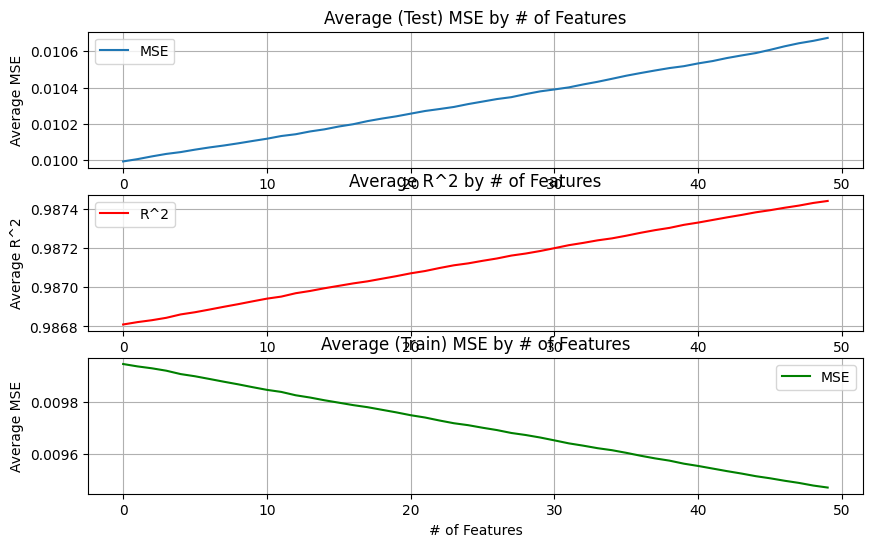

In [4]:
mean_mse_values = mse_df.mean()
r_squared_mean = r_squared_df.mean()
mean_mse_train = mse_train_df.mean()
fig, (ax1, ax2,ax3) = plt.subplots(3, 1, figsize=(10, 6))

ax1.plot(mean_mse_values)
ax1.set_ylabel('Average MSE')
ax1.set_title('Average (Test) MSE by # of Features') 
ax1.grid(True)
ax1.legend(['MSE'])

ax2.plot(r_squared_mean,color= 'red')
ax2.set_ylabel('Average R^2')
ax2.set_title('Average R^2 by # of Features') 
ax2.grid(True)
ax2.legend(['R^2'])

ax3.plot(mean_mse_train,color = 'green')
ax3.set_xlabel('# of Features')
ax3.set_ylabel('Average MSE')
ax3.set_title('Average (Train) MSE by # of Features') 
ax3.grid(True)
ax3.legend(['MSE'])


plt.show()


### Question 2 

$R^2$ Score is defined as follows : $R^2 = 1 - \frac{SS_{res}}{SS_{tot}}$ or alternatively,  

$R^2 = 1 - \frac{{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}}{{\sum_{i=1}^{n} (y_i - \bar{y})^2}}$. With increasing number of features, $SS_{total}$ stays constant, because we look at the variation of the $y$ column that we are trying to predict, therefore, it is independent of number of features. However, Sum of residuals decrease as we introduce more features since our model tends to overfit the data, hence, $R^2$ value keeps increasing with introduction of additional features. 

We can also simulate it using Monte Carlo Simulation. (see the code below)

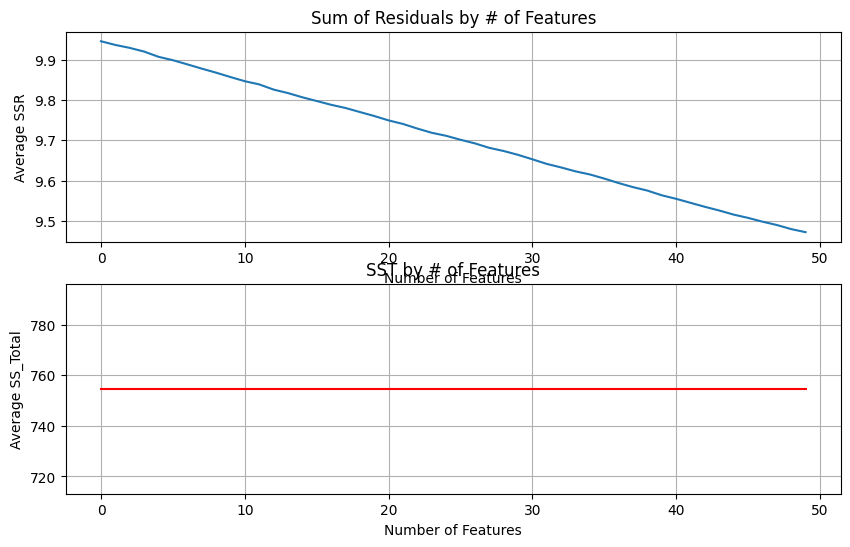

In [7]:
mean_ss = ss.mean()
mean_ss_tot = sstot.mean()
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6))

ax1.plot(mean_ss)
ax1.set_ylabel('Average SSR')
ax1.set_xlabel('Number of Features')
ax1.set_title('Sum of Residuals by # of Features') 
ax1.grid(True)


ax2.plot(mean_ss_tot,color= 'red')
ax2.set_ylabel('Average SS_Total')
ax2.set_xlabel('Number of Features')
ax2.set_title('SST by # of Features') 
ax2.grid(True)

plt.show()

As we can see in the plots, $SSR$ keeps decreasing with increasing number of features and as expected , $SST$ remains constant. Therefore, in $R^2$ score calculation, the value of nominator keeps being smaller, as opposed to a constant denominator, which again shows that $R^2$ increases, with more features. 

### Question 3

During training of regression model, use of $R^2$ metric mgiht be misleading, especially when we have too many features, and this is due to descreasing $SSR$. One of the possible solutions could be adding a penalty term that would improve $R^2$ value which is called 'Adjusted $R^2$'. 

Adjusted $R^2$ is defined as  = $1 - \frac{\frac{SS_{res}}{(n-K)}}{\frac{SS_{total}}{(n-1)}}$

* n is the number of observations

* K is the number of features

Since the model is having more penalty with more features, Adjusted $R^2$ helps with stabilizing $R^2$ value. Penalization against increasing model complexity helps preventing radical increases in $R^2$ value, which is misleading. 

* One alternative would be considering other metrics such as MSE or MAE. 


### Question 4

In [9]:
data = pd.read_csv('abalone.data.csv')
data.head()

,Sex,Length,Diameter,Height,Whole weightShucked weight,Viscera weight,Shell weight,Rings,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [14]:
data['Sex'].unique()
one_hot_encoded = pd.get_dummies(data['Sex'], prefix='Sex')
df_encoded = pd.concat([data, one_hot_encoded], axis=1)
df_encoded = df_encoded.drop('Sex', axis=1)
df_encoded.head()
df_encoded = df_encoded.rename(columns={'Age':'y'})

,Length,Diameter,Height,Whole weightShucked weight,Viscera weight,Shell weight,Rings,y,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,False,False,True
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,False,False,True
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,True,False,False
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,False,False,True
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,False,True,False


In [16]:
mse, r_squared,mse_train,ssr,sstot = linear_model(df_encoded)

In [18]:
print(mse)
print(r_squared)
print(mse_train)


5.289002715554704
0.5369194396724336
4.812693114825233


In [10]:
data.isna().any()

Sex                           False
Length                        False
Diameter                      False
Height                        False
Whole weightShucked weight    False
Viscera weight                False
Shell weight                  False
Rings                         False
Age                           False
dtype: bool